     Title1  Title2
0         0     101
1         1     101
2         2     101
3         3     101
4         4     101
..      ...     ...
195     195    1036
196     196    1036
197     197    1036
198     198    1036
199     199    1036

[200 rows x 2 columns]
xlab ylab zlab
/Users/alexandergadin/PycharmProjects/MeshAlyzer
Directory '/Users/alexandergadin/PycharmProjects/MeshAlyzer' already exists.


AttributeError: 'LinePlotter' object has no attribute 'fig'

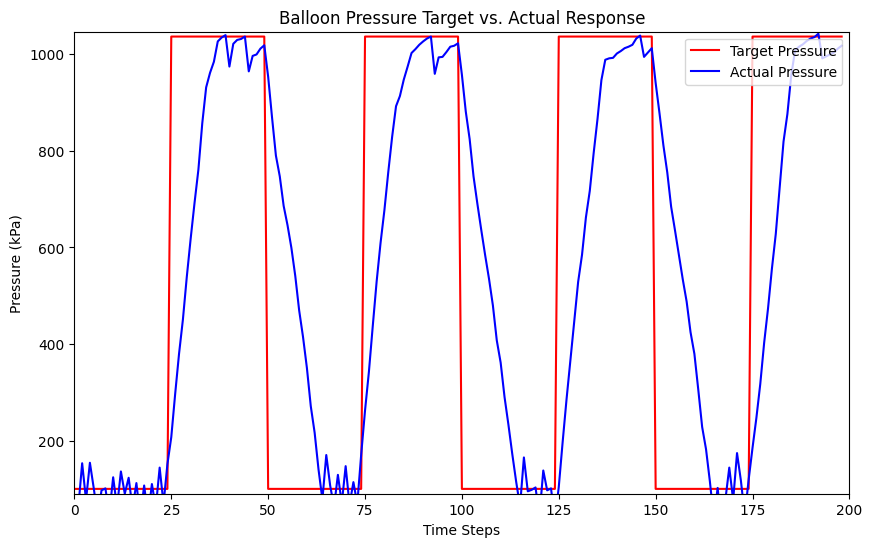

In [5]:
import readyplot as rp
# Re-run the simulation with a square wave target pressure and improved actual response
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

# Simulation parameters
time_steps = 200  # Total time steps
cycle_length = 50  # Time steps per cycle
min_pressure = 101  # in kPa
max_pressure = 1036  # in kPa

# Generate square wave target pressure
time = np.arange(time_steps)
target_pressure = np.where((time // (cycle_length // 2)) % 2 == 0, min_pressure, max_pressure)

# Simulate actual pressure response with a more pronounced initial spike
actual_pressure = np.zeros_like(target_pressure)
for i in range(1, len(actual_pressure)):
    if target_pressure[i] > actual_pressure[i - 1]:  # Increasing phase
        if actual_pressure[i - 1] < target_pressure[i] * 0.85:
            actual_pressure[i] = actual_pressure[i - 1] + random.uniform(50, 100)  # Very fast initial rise
        elif actual_pressure[i - 1] < target_pressure[i] * 0.95:
            actual_pressure[i] = actual_pressure[i - 1] + random.uniform(20, 50)  # Moderate climb
        else:
            actual_pressure[i] = actual_pressure[i - 1] + random.uniform(5, 10)  # Fine-tuning to target
    else:  # Decreasing phase
        actual_pressure[i] = actual_pressure[i - 1] - random.uniform(40, 80)  # Faster decrease

    # Add slight random noise
    actual_pressure[i] += random.uniform(-5, 5)

# Create an animation
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size here
ax.set_xlim(0, time_steps)
ax.set_ylim(min_pressure - 10, max_pressure + 10)
ax.set_xlabel("Time Steps")
ax.set_ylabel("Pressure (kPa)")
ax.set_title("Balloon Pressure Target vs. Actual Response")

target_line, = ax.plot([], [], 'r-', label="Target Pressure")
actual_line, = ax.plot([], [], 'b-', label="Actual Pressure")
ax.legend(loc='upper right')  # Lock the legend to the top right

def init():
    target_line.set_data([], [])
    actual_line.set_data([], [])
    return target_line, actual_line

def update(frame):
    target_line.set_data(time[:frame], target_pressure[:frame])
    actual_line.set_data(time[:frame], actual_pressure[:frame])
    return target_line, actual_line

ani = animation.FuncAnimation(fig, update, frames=time_steps, init_func=init, blit=True)

# Save the animation as a GIF
gif_filename = "./balloon_pressure_simulation.gif"
# ani.save(gif_filename, writer='pillow', fps=20)

import pandas as pd
df = pd.DataFrame([time,target_pressure]).T
df.columns = ['Title1', 'Title2']
print(df)

plotter = rp.line(
    time,target_pressure, # essentials
    xlines = [16,17],ylines = 80, # essential x/y lines, can pass list if desired
    custom_x_label='Title1',custom_y_label='Title2',title='Title3', # optional titles
    colors=['maroon','darkcyan'],markers=['o','s'],markersize=7, # optional colors/markers
    capsize = 5, # optional error capsize
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    #legend = None, # optional suppress the legend
    dashes = False,#style = ['' for i in z],
    folder_name = '/Users/alexandergadin/PycharmProjects/MeshAlyzer/figure1.png') # optional suppress the legend


plotter.save()



In [ ]:
## INITIALIZE X,Y,Z, AND HI/LOW Y ERROR BARS:
x = [21,28,35,21,28,35] # list or numpy array of x
y = [70,75,78,100,90,85] # list or numpy array of y
z = ['A','A','A','B','B','B'] # group name for each data point (x,y,z, could be dataframe)
yerr_hi = [1,2,3,4,5,6] # custom hi error values
yerr_low = [6,5,4,3,2,1] # custom low error values

## INITIALIZE THE PLOTTER WITH ALL OPTIONS (ONLY FIRST 2 LINES REQUIRED)
plotter = rp.line(
    x,y,z,low_yerror_vals = yerr_low,hi_yerror_vals = yerr_hi, # essentials
    xlines = [16,17],ylines = 80, # essential x/y lines, can pass list if desired
    custom_x_label='Title1',custom_y_label='Title2',title='Title3', # optional titles
    colors=['maroon','blue'],markers=['o','s'],markersize=7, # optional colors/markers
    capsize = 5, # optional error capsize
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = None, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/figure1.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)

## HANDLE AXES AND FIG AS DESIRED
ax.set_ylim(60,120)
ax.set_xticks(x[0:3])
plotter.save()

## DATA FRAME VERSION:
import pandas as pd
df = pd.DataFrame([x,y,z,yerr_low,yerr_hi]).T
df.columns = ['Title1', 'Title2', 'Group','yerr_low','yerr_hi']
print(df)

plotter2 = rp.line(
    df,low_yerror_vals = df['yerr_low'],hi_yerror_vals = df['yerr_hi']) # If no xlab,ylab,zlab supplied, takes first three columns as x,y,z. 
#Future versions will parse error labels if errors are strings within main DF so df only written once here
plotter2.plot() # This is fixed in unreleased version, but there are name issues if xlab and ylab not supplied, so turn off saving (save=False) or add dataframe names

In [ ]:
fig,ax = plotter.plot()

# Average all RoM graphs

In [ ]:
from matplotlib.lines import Line2D

## INITIALIZE X,Y,Z, AND HI/LOW Y ERROR BARS:
x = [21,28,35,21,28,35] # list or numpy array of x
z = ['INJ CONTRA','INJ CONTRA','INJ CONTRA','INJ','INJ','INJ'] # group name for each data point (x,y,z, could be dataframe)
y6548 = [134, 128.27, 131.9111111, 63.38888889, 91.41111111, 109.2777778]
y6549 = [139.0777778, 148.6777778, 122.2555556, 78.78888889, 101.9, 117.1888889]

y = [(a + b) / 2 for a, b in zip(y6548, y6549)]
yerr_low = [abs(a - avg) for a, avg in zip(y6548, y)]
yerr_hi = [abs(b - avg) for b, avg in zip(y6549, y)]

print("y:", y)
print("yerr_low:", yerr_low)
print("yerr_hi:", yerr_hi)

## INITIALIZE THE PLOTTER WITH ALL OPTIONS (ONLY FIRST 2 LINES REQUIRED)
plotter = rp.line(
    x,y,z,low_yerror_vals = yerr_low,hi_yerror_vals = yerr_hi, # essentials
    ylines = 118.51, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Range of Motion (°)',title='Average Arm Range of Motion Across Five Cycles', # optional titles
    colors=['blue','red'],markers=['o','s'],markersize=7, # optional colors/markers
    capsize = 5, # optional error capsize
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    dashes=False,
    folder_name = '/Users/alexandergadin/Desktop/img/ROMaveragelineploterrorbars.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)

## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

## HANDLE AXES AND FIG AS DESIRED
ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly

plotter.save()

plotter = rp.line(
    x,y,z, low_yerror_vals = [0,0,0,0,0,0] ,hi_yerror_vals = [0,0,0,0,0,0], # essentials
    ylines = 118.51, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Range of Motion (°)',title='Average Arm Range of Motion Across Five Cycles', # optional titles
    colors=['blue','red'],markers=['o','s'],markersize=7, # optional colors/markers
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    dashes=False,
    folder_name = '/Users/alexandergadin/Desktop/img/ROMaveragelineplot.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)

## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

## HANDLE AXES AND FIG AS DESIRED
ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)
plotter.save()

## Last Cycle Value

In [ ]:
from matplotlib.lines import Line2D

## INITIALIZE X,Y,Z, AND HI/LOW Y ERROR BARS:
x = [21,28,35,21,28,35] # list or numpy array of x
z = ['INJ CONTRA','INJ CONTRA','INJ CONTRA','INJ','INJ','INJ'] # group name for each data point (x,y,z, could be dataframe)
y6548 = [138, 147.6, 123, 68.5, 101, 116.9]
y6549 = [135.7, 130.7, 132.8, 86.3, 106.3, 122.9]

y = [(a + b) / 2 for a, b in zip(y6548, y6549)]
yerr_low = [abs(a - avg) for a, avg in zip(y6548, y)]
yerr_hi = [abs(b - avg) for b, avg in zip(y6549, y)]

print("y:", y)
print("yerr_low:", yerr_low)
print("yerr_hi:", yerr_hi)

## INITIALIZE THE PLOTTER WITH ALL OPTIONS (ONLY FIRST 2 LINES REQUIRED)
plotter = rp.line(
    x,y,z,low_yerror_vals = yerr_low,hi_yerror_vals = yerr_hi, # essentials
    ylines = 118.51, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Range of Motion (°)',title='Final Cycle Range of Motion', # optional titles
    colors=['blue','red'],markers=['o','s'],markersize=7, dashes=False,  # optional colors/markers
    capsize = 5, # optional error capsize
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/ROM5cycleploterrorbars.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)

## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

## HANDLE AXES AND FIG AS DESIRED
ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

plotter = rp.line(
    x,y,z, low_yerror_vals = [0,0,0,0,0,0] ,hi_yerror_vals = [0,0,0,0,0,0], # essentials
    ylines = 118.51, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Range of Motion (°)',title='Final Cycle Range of Motion', # optional titles
    colors=['blue','red'],markers=['o','s'],markersize=7, dashes=False, # optional colors/markers
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/ROM5cyclelineplot.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)


## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

## Average Flexion Stiffness change

In [ ]:
from matplotlib.lines import Line2D

## INITIALIZE X,Y,Z, AND HI/LOW Y ERROR BARS:
x = [21,28,35,21,28,35] # list or numpy array of x
z = ['INJ CONTRA','INJ CONTRA','INJ CONTRA','INJ','INJ','INJ'] # group name for each data point (x,y,z, could be dataframe)
y6548 = [-0.03214, -0.02698, -0.03048, -0.05328, -0.02746, -0.04212]
y6549 = [-0.04002, -0.02334, -0.0281, -0.04026, -0.03324, -0.03016]

y = [(a + b) / 2 for a, b in zip(y6548, y6549)]
yerr_low = [abs(a - avg) for a, avg in zip(y6548, y)]
yerr_hi = [abs(b - avg) for b, avg in zip(y6549, y)]

print("y:", y)
print("yerr_low:", yerr_low)
print("yerr_hi:", yerr_hi)

## INITIALIZE THE PLOTTER WITH ALL OPTIONS (ONLY FIRST 2 LINES REQUIRED)
plotter = rp.line(
    x,y,z,low_yerror_vals = yerr_low,hi_yerror_vals = yerr_hi, # essentials
    ylines = -0.03125, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Stiffness (N/°)',title='Average Arm Flexion Stiffness', # optional titles
    colors=['blue','red'],markers=['o','s'],markersize=7, dashes=False,  # optional colors/markers
    capsize = 5, # optional error capsize
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/Average_Flexion_stiffness_errorbar.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)

## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

## HANDLE AXES AND FIG AS DESIRED
#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
#ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

plotter = rp.line(
    x,y,z, low_yerror_vals = [0,0,0,0,0,0] ,hi_yerror_vals = [0,0,0,0,0,0], # essentials
    ylines = -0.03125, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Stiffness (N/°)',title='Average Arm Flexion Stiffness', # optional titles
    colors=['blue','red'],markers=['o','s'],markersize=7, dashes=False, # optional colors/markers
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/Average_Flexion_stiffness.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)


## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
# ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

## Final Cycle Flexion Stiffness change

In [ ]:
from matplotlib.lines import Line2D

## INITIALIZE X,Y,Z, AND HI/LOW Y ERROR BARS:
x = [21,28,35,21,28,35] # list or numpy array of x
z = ['INJ CONTRA','INJ CONTRA','INJ CONTRA','INJ','INJ','INJ'] # group name for each data point (x,y,z, could be dataframe)
y6548 = [-0.032, -0.0308, -0.0335, -0.0539, -0.0256, -0.0318]
y6549 = [-0.0406, -0.0218, -0.0263, -0.0381, -0.0298, -0.026]

y = [(a + b) / 2 for a, b in zip(y6548, y6549)]
yerr_low = [abs(a - avg) for a, avg in zip(y6548, y)]
yerr_hi = [abs(b - avg) for b, avg in zip(y6549, y)]

print("y:", y)
print("yerr_low:", yerr_low)
print("yerr_hi:", yerr_hi)

## INITIALIZE THE PLOTTER WITH ALL OPTIONS (ONLY FIRST 2 LINES REQUIRED)
plotter = rp.line(
    x,y,z,low_yerror_vals = yerr_low,hi_yerror_vals = yerr_hi, # essentials
    ylines = -0.03125, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Stiffness (N/°)',title='Final Cycle Arm Flexion Stiffness', # optional titles
    colors=['blue','red'],markers=['o','s'],markersize=7, dashes=False,  # optional colors/markers
    capsize = 5, # optional error capsize
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/5Cyle_Flexion_stiffness_errorbar.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)

## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

## HANDLE AXES AND FIG AS DESIRED
#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
#ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

plotter = rp.line(
    x,y,z, low_yerror_vals = [0,0,0,0,0,0] ,hi_yerror_vals = [0,0,0,0,0,0], # essentials
    ylines = -0.03125, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Stiffness (N/°)',title='Final Cycle Arm Flexion Stiffness', # optional titles
    colors=['blue','red'],markers=['o','s'],markersize=7, dashes=False, # optional colors/markers
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/5Cyle_Flexion_stiffness.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)


## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
# ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

## Average Extension Stiffness
Also add change of flexion on combined graph

In [ ]:
from matplotlib.lines import Line2D

## INITIALIZE X,Y,Z, AND HI/LOW Y ERROR BARS:
x = [21,28,35,21,28,35] # list or numpy array of x
z = ['INJ CONTRA','INJ CONTRA','INJ CONTRA','INJ','INJ','INJ'] # group name for each data point (x,y,z, could be dataframe)
y6548 = [-0.040082222, -0.029264444, -0.05809777, -0.039742222, -0.026273333, -0.026013333]
y6549 = [-0.029157778, -0.032971111, -0.029877778, -0.030762222, -0.02256, -0.027395556]

y = [(a + b) / 2 for a, b in zip(y6548, y6549)]
yerr_low = [abs(a - avg) for a, avg in zip(y6548, y)]
yerr_hi = [abs(b - avg) for b, avg in zip(y6549, y)]

print("y:", y)
print("yerr_low:", yerr_low)
print("yerr_hi:", yerr_hi)

## INITIALIZE THE PLOTTER WITH ALL OPTIONS (ONLY FIRST 2 LINES REQUIRED)
plotter = rp.line(
    x,y,z,low_yerror_vals = yerr_low,hi_yerror_vals = yerr_hi, # essentials
    ylines = -0.026693889, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Stiffness (N/°)',title='Average Arm Extension Stiffness', # optional titles
    colors=['blue','red'],markers=['o','s'],markersize=7, dashes=False,  # optional colors/markers
    capsize = 5, # optional error capsize
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/Average_Extension_stiffness_errorbar.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)

## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

## HANDLE AXES AND FIG AS DESIRED
#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
#ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

plotter = rp.line(
    x,y,z, low_yerror_vals = [0,0,0,0,0,0] ,hi_yerror_vals = [0,0,0,0,0,0], # essentials
    ylines = -0.026693889, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Stiffness (N/°)',title='Average Arm Extension Stiffness', # optional titles
    colors=['blue','red'],markers=['o','s'],markersize=7, dashes=False, # optional colors/markers
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/Average_Extension_stiffness.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)


## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
# ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

## Final Cycle Extension Stiffness change

In [ ]:
from matplotlib.lines import Line2D

## INITIALIZE X,Y,Z, AND HI/LOW Y ERROR BARS:
x = [21,28,35,21,28,35] # list or numpy array of x
z = ['INJ CONTRA','INJ CONTRA','INJ CONTRA','INJ','INJ','INJ'] # group name for each data point (x,y,z, could be dataframe)
y6548 = [-0.0443, -0.0354, -0.0609, -0.0372, -0.024, -0.0213]
y6549 = [-0.0339, -0.0371, -0.0328, -0.0308, -0.0205, -0.0254]


y = [(a + b) / 2 for a, b in zip(y6548, y6549)]
yerr_low = [abs(a - avg) for a, avg in zip(y6548, y)]
yerr_hi = [abs(b - avg) for b, avg in zip(y6549, y)]

print("y:", y)
print("yerr_low:", yerr_low)
print("yerr_hi:", yerr_hi)

## INITIALIZE THE PLOTTER WITH ALL OPTIONS (ONLY FIRST 2 LINES REQUIRED)
plotter = rp.line(
    x,y,z,low_yerror_vals = yerr_low,hi_yerror_vals = yerr_hi, # essentials
    ylines = -0.026693889, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Stiffness (N/°)',title='Final Cycle Arm Extension Stiffness', # optional titles
    colors=['blue','red'],markers=['o','s'],markersize=7, dashes=False,  # optional colors/markers
    capsize = 5, # optional error capsize
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/5Cyle_Extension_stiffness_errorbar.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)

## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

## HANDLE AXES AND FIG AS DESIRED
#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
#ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

plotter = rp.line(
    x,y,z, low_yerror_vals = [0,0,0,0,0,0] ,hi_yerror_vals = [0,0,0,0,0,0], # essentials
    ylines = -0.026693889, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Stiffness (N/°)',title='Final Cycle Arm Extension Stiffness', # optional titles
    colors=['blue','red'],markers=['o','s'],markersize=7, dashes=False, # optional colors/markers
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/5Cyle_Extension_stiffness.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)


## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

ax.set_yticks([-0.06, -0.055, -0.05, -0.045, -0.04, -0.035, -0.03, -0.025, -0.02])
ax.set_xticks(x[0:3])
# ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

# Average combined stiffness graph

In [ ]:
from matplotlib.lines import Line2D

## INITIALIZE X,Y,Z, AND HI/LOW Y ERROR BARS:
x = [21,28,35,21,28,35,21,28,35, 21,28,35] # list or numpy array of x
z = ['E-INJ CONTRA','E-INJ CONTRA','E-INJ CONTRA','E-INJ','E-INJ','E-INJ','F-INJ CONTRA','F-INJ CONTRA','F-INJ CONTRA','F-INJ','F-INJ','F-INJ'] # group name for each data point (x,y,z, could be dataframe)
#Extension Values
y6548_1 = [-0.040082222, -0.029264444, -0.058097778, -0.039742222, -0.026273333, -0.026013333]

y6549_1 = [-0.029157778, -0.032971111, -0.031655556, -0.030762222, -0.02256, -0.027395556]


#Flexion Values
y6548_2 = [-0.03214, -0.02698, -0.03048, -0.05328, -0.02746, -0.04212]

y6549_2 = [-0.04002, -0.02334, -0.0281, -0.04026, -0.03324, -0.03016]


y6548_combined = y6548_1 + y6548_2
y6549_combined = y6549_1 + y6549_2



y = [(a + b) / 2 for a, b in zip(y6548_combined, y6549_combined)]
yerr_low = [abs(a - avg) for a, avg in zip(y6548_combined, y)]
yerr_hi = [abs(b - avg) for b, avg in zip(y6549_combined, y)]

print("y:", y)
print("yerr_low:", yerr_low)
print("yerr_hi:", yerr_hi)

## INITIALIZE THE PLOTTER WITH ALL OPTIONS (ONLY FIRST 2 LINES REQUIRED)
plotter = rp.line(
    x,y,z,low_yerror_vals = yerr_low,hi_yerror_vals = yerr_hi, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Stiffness (N/°)',title='Average Arm Stiffness', # optional titles
    colors=['blue','red', 'green', 'deeppink' ],markers=['o','s'],markersize=7, dashes=False,  # optional colors/markers
    capsize = 5, # optional error capsize
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/Average_Stiffness_combined_errorbar.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)

## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
from matplotlib.lines import Line2D

# Add the horizontal line to the plot
ax.axhline(y=-0.03125, color='dimgray', linestyle='--', linewidth=2, label='F-CTRL')

# Add the second line with a different color
ax.axhline(y=-0.026693889, color='tan', linestyle='--', linewidth=2, label='E-CTRL')

# Update the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

# Print lines to verify
print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        if line.get_color() == 'dimgray':
            line.set(linewidth=2, color='dimgray')
        elif line.get_color() == 'tan':
            line.set(linewidth=2, color='tan')

## HANDLE AXES AND FIG AS DESIRED
#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
#ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

plotter = rp.line(
    x,y,z, low_yerror_vals = [0,0,0,0,0,0,0,0,0,0,0,0] ,hi_yerror_vals = [0,0,0,0,0,0, 0,0,0,0,0,0], # essentials
     # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Stiffness (N/°)',title='Average Arm Stiffness', # optional titles

    colors=['blue','red', 'green', 'deeppink' ],markers=['o','s'],markersize=7, dashes=False, # optional colors/markers
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/Average_Stiffness_combined.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)


## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
from matplotlib.lines import Line2D

# Add the horizontal line to the plot
ax.axhline(y=-0.03125, color='dimgray', linestyle='--', linewidth=2, label='F-CTRL')

# Add the second line with a different color
ax.axhline(y=-0.026693889, color='tan', linestyle='--', linewidth=2, label='E-CTRL')

# Update the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

# Print lines to verify
print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        if line.get_color() == 'dimgray':
            line.set(linewidth=2, color='dimgray')
        elif line.get_color() == 'tan':
            line.set(linewidth=2, color='tan')

#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
# ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

In [ ]:
from matplotlib.lines import Line2D

## INITIALIZE X,Y,Z, AND HI/LOW Y ERROR BARS:
x = [21,28,35,21,28,35,21,28,35, 21,28,35] # list or numpy array of x
z = ['E-INJ CONTRA','E-INJ CONTRA','E-INJ CONTRA','E-INJ','E-INJ','E-INJ','F-INJ CONTRA','F-INJ CONTRA','F-INJ CONTRA','F-INJ','F-INJ','F-INJ'] # group name for each data point (x,y,z, could be dataframe)
#Extension Values
y6548_1 = [-0.040082222, -0.029264444, -0.058097778, -0.039742222, -0.026273333, -0.026013333]

y6549_1 = [-0.029157778, -0.032971111, -0.031655556, -0.030762222, -0.02256, -0.027395556]


#Flexion Values
y6548_2 = [-0.03214, -0.02698, -0.03048, -0.05328, -0.02746, -0.04212]

y6549_2 = [-0.04002, -0.02334, -0.0281, -0.04026, -0.03324, -0.03016]


y6548_combined = y6548_1 + y6548_2
y6549_combined = y6549_1 + y6549_2



y = [(a + b) / 2 for a, b in zip(y6548_combined, y6549_combined)]
yerr_low = [abs(a - avg) for a, avg in zip(y6548_combined, y)]
yerr_hi = [abs(b - avg) for b, avg in zip(y6549_combined, y)]

print("y:", y)
print("yerr_low:", yerr_low)
print("yerr_hi:", yerr_hi)

## INITIALIZE THE PLOTTER WITH ALL OPTIONS (ONLY FIRST 2 LINES REQUIRED)
plotter = rp.line(
    x,y,z,low_yerror_vals = yerr_low,hi_yerror_vals = yerr_hi, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Stiffness (N/°)',title='Average Arm Stiffness', # optional titles
    colors=['blue','red', 'green', 'deeppink' ],markers=['o','s'],markersize=7, dashes=False,  # optional colors/markers
    capsize = 5, # optional error capsize
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/Average_Stiffness_combined_errorbar_no_control.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)

## HANDLE AXES AND FIG AS DESIRED
#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
#ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

plotter = rp.line(
    x,y,z, low_yerror_vals = [0,0,0,0,0,0,0,0,0,0,0,0] ,hi_yerror_vals = [0,0,0,0,0,0, 0,0,0,0,0,0], # essentials
     # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Stiffness (N/°)',title='Average Arm Stiffness', # optional titles

    colors=['blue','red', 'green', 'deeppink' ],markers=['o','s'],markersize=7, dashes=False, # optional colors/markers
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/Average_Stiffness_combined_no_control.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)


#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
# ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

# 5th Cycle Combined Stiffness graph

In [ ]:
from matplotlib.lines import Line2D

## INITIALIZE X,Y,Z, AND HI/LOW Y ERROR BARS:
x = [21,28,35,21,28,35,21,28,35, 21,28,35] # list or numpy array of x
z = ['E-INJ CONTRA','E-INJ CONTRA','E-INJ CONTRA','E-INJ','E-INJ','E-INJ','F-INJ CONTRA','F-INJ CONTRA','F-INJ CONTRA','F-INJ','F-INJ','F-INJ'] # group name for each data point (x,y,z, could be dataframe)
#Extension Values
y6548_1 = [-0.0443, -0.0354, -0.0609, -0.0372, -0.024, -0.0213]
y6549_1 = [-0.0339, -0.0371, -0.0328, -0.0308, -0.0205, -0.0254]


#Flexion Values
y6548_2 = [-0.032, -0.0308, -0.0335, -0.0539, -0.0256, -0.0318]
y6549_2 = [-0.0406, -0.0218, -0.0263, -0.0381, -0.0298, -0.026]


y6548_combined = y6548_1 + y6548_2
y6549_combined = y6549_1 + y6549_2



y = [(a + b) / 2 for a, b in zip(y6548_combined, y6549_combined)]
yerr_low = [abs(a - avg) for a, avg in zip(y6548_combined, y)]
yerr_hi = [abs(b - avg) for b, avg in zip(y6549_combined, y)]

print("y:", y)
print("yerr_low:", yerr_low)
print("yerr_hi:", yerr_hi)

## INITIALIZE THE PLOTTER WITH ALL OPTIONS (ONLY FIRST 2 LINES REQUIRED)
plotter = rp.line(
    x,y,z,low_yerror_vals = yerr_low,hi_yerror_vals = yerr_hi, # essentials
 # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Stiffness (N/°)',title='Final Cycle Arm Stiffness', # optional titles
    colors=['blue','red', 'green', 'deeppink' ],markers=['o','s'],markersize=7, dashes=False,  # optional colors/markers
    capsize = 5, # optional error capsize
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/5cycle_Stiffness_combined_errorbar.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)

## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
from matplotlib.lines import Line2D

# Add the horizontal line to the plot
ax.axhline(y=-0.03125, color='dimgray', linestyle='--', linewidth=2, label='F-CTRL')

# Add the second line with a different color
ax.axhline(y=-0.026693889, color='tan', linestyle='--', linewidth=2, label='E-CTRL')

# Update the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

# Print lines to verify
print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        if line.get_color() == 'dimgray':
            line.set(linewidth=2, color='dimgray')
        elif line.get_color() == 'tan':
            line.set(linewidth=2, color='tan')

## HANDLE AXES AND FIG AS DESIRED
#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
#ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

plotter = rp.line(
    x,y,z, low_yerror_vals = [0,0,0,0,0,0,0,0,0,0,0,0] ,hi_yerror_vals = [0,0,0,0,0,0, 0,0,0,0,0,0], # essentials
 # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Stiffness (N/°)',title='Final Cycle Arm Stiffness', # optional titles
    colors=['blue','red', 'green', 'deeppink' ],markers=['o','s'],markersize=7, dashes=False, # optional colors/markers
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/5Cycle_Stiffness_combined.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)


## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
from matplotlib.lines import Line2D

# Add the horizontal line to the plot
ax.axhline(y=-0.03125, color='dimgray', linestyle='--', linewidth=2, label='F-CTRL')

# Add the second line with a different color
ax.axhline(y=-0.026693889, color='tan', linestyle='--', linewidth=2, label='E-CTRL')

# Update the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

# Print lines to verify
print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        if line.get_color() == 'dimgray':
            line.set(linewidth=2, color='dimgray')
        elif line.get_color() == 'tan':
            line.set(linewidth=2, color='tan')


#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
# ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

In [ ]:
from matplotlib.lines import Line2D

## INITIALIZE X,Y,Z, AND HI/LOW Y ERROR BARS:
x = [21,28,35,21,28,35,21,28,35, 21,28,35] # list or numpy array of x
z = ['E-INJ CONTRA','E-INJ CONTRA','E-INJ CONTRA','E-INJ','E-INJ','E-INJ','F-INJ CONTRA','F-INJ CONTRA','F-INJ CONTRA','F-INJ','F-INJ','F-INJ'] # group name for each data point (x,y,z, could be dataframe)
#Extension Values
y6548_1 = [-0.0443, -0.0354, -0.0609, -0.0372, -0.024, -0.0213]
y6549_1 = [-0.0339, -0.0371, -0.0328, -0.0308, -0.0205, -0.0254]


#Flexion Values
y6548_2 = [-0.032, -0.0308, -0.0335, -0.0539, -0.0256, -0.0318]
y6549_2 = [-0.0406, -0.0218, -0.0263, -0.0381, -0.0298, -0.026]


y6548_combined = y6548_1 + y6548_2
y6549_combined = y6549_1 + y6549_2



y = [(a + b) / 2 for a, b in zip(y6548_combined, y6549_combined)]
yerr_low = [abs(a - avg) for a, avg in zip(y6548_combined, y)]
yerr_hi = [abs(b - avg) for b, avg in zip(y6549_combined, y)]

print("y:", y)
print("yerr_low:", yerr_low)
print("yerr_hi:", yerr_hi)

## INITIALIZE THE PLOTTER WITH ALL OPTIONS (ONLY FIRST 2 LINES REQUIRED)
plotter = rp.line(
    x,y,z,low_yerror_vals = yerr_low,hi_yerror_vals = yerr_hi, # essentials
 # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Stiffness (N/°)',title='Final Cycle Arm Stiffness', # optional titles
    colors=['blue','red', 'green', 'deeppink' ],markers=['o','s'],markersize=7, dashes=False,  # optional colors/markers
    capsize = 5, # optional error capsize
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/5cycle_Stiffness_combined_errorbar_no_control.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)

## HANDLE AXES AND FIG AS DESIRED
#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
#ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

plotter = rp.line(
    x,y,z, low_yerror_vals = [0,0,0,0,0,0,0,0,0,0,0,0] ,hi_yerror_vals = [0,0,0,0,0,0, 0,0,0,0,0,0], # essentials
 # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Stiffness (N/°)',title='Final Cycle Arm Stiffness', # optional titles
    colors=['blue','red', 'green', 'deeppink' ],markers=['o','s'],markersize=7, dashes=False, # optional colors/markers
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/5Cycle_Stiffness_combined_no_control.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)



#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
# ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

# Average Neutral zone length

In [ ]:
from matplotlib.lines import Line2D

## INITIALIZE X,Y,Z, AND HI/LOW Y ERROR BARS:
x = [21,28,35,21,28,35] # list or numpy array of x
z = ['INJ CONTRA','INJ CONTRA','INJ CONTRA','INJ','INJ','INJ'] # group name for each data point (x,y,z, could be dataframe)
y6548 = [100.1777778, 102.3666667, 87.02222222,35.66666667, 54.1, 67.61111111]
y6549 = [94.6, 78.68888889, 84.76666667, 43.3, 59.53333333, 72.76666667]

y = [(a + b) / 2 for a, b in zip(y6548, y6549)]
yerr_low = [abs(a - avg) for a, avg in zip(y6548, y)]
yerr_hi = [abs(b - avg) for b, avg in zip(y6549, y)]

print("y:", y)
print("yerr_low:", yerr_low)
print("yerr_hi:", yerr_hi)

## INITIALIZE THE PLOTTER WITH ALL OPTIONS (ONLY FIRST 2 LINES REQUIRED)
plotter = rp.line(
    x,y,z,low_yerror_vals = yerr_low,hi_yerror_vals = yerr_hi, # essentials
    ylines = 75.81388889, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Neutral Zone Length (°)',title='Average Neutral Zone Length', # optional titles
    colors=['blue','red'],markers=['o','s'],markersize=7, dashes=False,  # optional colors/markers
    capsize = 5, # optional error capsize
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/Average_Neutral_zone_length_errorbars.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)

## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

## HANDLE AXES AND FIG AS DESIRED
#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
#ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

plotter = rp.line(
    x,y,z, low_yerror_vals = [0,0,0,0,0,0] ,hi_yerror_vals = [0,0,0,0,0,0], # essentials
    ylines = 75.81388889, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Neutral Zone Length (°)',title='Average Neutral Zone Length', # optional titles
    colors=['blue','red'],markers=['o','s'],markersize=7, dashes=False, # optional colors/markers
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/Average_Neutral_zone_length.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)


## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
# ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

# Final Cycle Neutral zone length

In [ ]:
from matplotlib.lines import Line2D

## INITIALIZE X,Y,Z, AND HI/LOW Y ERROR BARS:
x = [21,28,35,21,28,35] # list or numpy array of x
z = ['INJ CONTRA','INJ CONTRA','INJ CONTRA','INJ','INJ','INJ'] # group name for each data point (x,y,z, could be dataframe)
y6548 = [102, 102.3666667, 105.4,40.1, 67.4, 68.4]
y6549 = [96.2, 76.7, 85.7, 48.9, 60.6, 75.4]

y = [(a + b) / 2 for a, b in zip(y6548, y6549)]
yerr_low = [abs(a - avg) for a, avg in zip(y6548, y)]
yerr_hi = [abs(b - avg) for b, avg in zip(y6549, y)]

print("y:", y)
print("yerr_low:", yerr_low)
print("yerr_hi:", yerr_hi)

## INITIALIZE THE PLOTTER WITH ALL OPTIONS (ONLY FIRST 2 LINES REQUIRED)
plotter = rp.line(
    x,y,z,low_yerror_vals = yerr_low,hi_yerror_vals = yerr_hi, # essentials
    ylines = 75.81388889, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Neutral Zone Length (°)',title='Final Cycle Neutral Zone Length', # optional titles
    colors=['blue','red'],markers=['o','s'],markersize=7, dashes=False,  # optional colors/markers
    capsize = 5, # optional error capsize
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/5Cycle_Neutral_zone_length_errorbars.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)

## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

## HANDLE AXES AND FIG AS DESIRED
#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
#ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

plotter = rp.line(
    x,y,z, low_yerror_vals = [0,0,0,0,0,0] ,hi_yerror_vals = [0,0,0,0,0,0], # essentials
    ylines = 75.81388889, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Neutral Zone Length (°)',title='Final Cycle Neutral Zone Length', # optional titles
    colors=['blue','red'],markers=['o','s'],markersize=7, dashes=False, # optional colors/markers
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/5Cycle_Neutral_zone_length.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)


## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
# ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

# Difference between Average INJ CONTRAured and injured RoM

In [ ]:
from matplotlib.lines import Line2D

## INITIALIZE X,Y,Z, AND HI/LOW Y ERROR BARS:
x = [21,28,35] # list or numpy array of x
z = ['INJ - CONTRA INJ','INJ - CONTRA INJ','INJ - CONTRA INJ'] # group name for each data point (x,y,z, could be dataframe)
y6548 = [134, 128.27, 131.9111111, 63.38888889, 91.41111111, 109.2777778]
y6549 = [139.0777778, 148.6777778, 122.2555556, 78.78888889, 101.9, 117.1888889]

y6548_subtracted = [y6548[i + 3] - y6548[i] for i in range(3)]
y6549_subtracted = [y6549[i + 3]- y6549[i]  for i in range(3)]


y = [(a + b) / 2 for a, b in zip(y6548_subtracted, y6549_subtracted)]
yerr_low = [abs(a - avg) for a, avg in zip(y6548_subtracted, y)]
yerr_hi = [abs(b - avg) for b, avg in zip(y6549_subtracted, y)]

print("y:", y)
print("yerr_low:", yerr_low)
print("yerr_hi:", yerr_hi)

## INITIALIZE THE PLOTTER WITH ALL OPTIONS (ONLY FIRST 2 LINES REQUIRED)
plotter = rp.line(
    x,y,z,low_yerror_vals = yerr_low,hi_yerror_vals = yerr_hi, # essentials
    ylines = 1.122, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Range of Motion Difference (°)',title='Range of Motion Difference Injured - Contralateral', # optional titles
    colors=['blue','red'],markers=['o','s'],markersize=7, dashes=False,  # optional colors/markers
    capsize = 5, # optional error capsize
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/Average_ROM_dif_errorbars.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)

## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

## HANDLE AXES AND FIG AS DESIRED
#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
#ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

plotter = rp.line(
    x,y,z, low_yerror_vals = [0,0,0] ,hi_yerror_vals = [0,0,0], # essentials
    ylines = 1.122, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Range of Motion Difference (°)',title='Range of Motion Difference Injured - Contralateral', # optional titles
    colors=['blue','red'],markers=['o','s'],markersize=7, dashes=False, # optional colors/markers
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/Average_ROM_dif.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)


## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
# ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

# Biax Data

In [ ]:
import readyplot as rp
import pandas as pd
df = pd.read_csv('./data/6207 Left_07252024_102541.csv_noHeader_processed.csv')
df['z'] = 'zlab'


print(df.iloc[10:15])## INITIALIZE THE PLOTTER WITH ALL OPTIONS (ONLY FIRST 2 LINES REQUIRED)

## INITIALIZE THE PLOTTER WITH ALL OPTIONS (ONLY FIRST 2 LINES REQUIRED)
plotter = rp.line(
    df, # essentials # essential x/y lines, can pass list if desired
    custom_x_label='Angle(°)',custom_y_label='Force (N)', # optional titles
    colors=['blue'],markers=['o'],markersize=0, dashes=False,  # optional colors/markers
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = False, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/biaxdata.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)

## HANDLE AXES AND FIG AS DESIRED
#ax.set_yticks([50,75,100,125,150])
# ax.set_xticks(x[0:3])
#ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(20, 110)  # Set y-axis limits explicitly
plotter.save()

          angle     force     z
0     59.897084 -0.122684  zlab
1     60.205832 -0.131045  zlab
2     60.514580 -0.135609  zlab
3     60.823328 -0.159574  zlab
4     61.132075 -0.182252  zlab
...         ...       ...   ...
2307  18.833619  0.683825  zlab
2308  18.833619  0.683430  zlab
2309  18.833619  0.683020  zlab
2310  18.833619  0.682397  zlab
2311  18.833619  0.681532  zlab

[2312 rows x 3 columns]
        angle     force
10  62.984563 -0.213163
11  63.293310 -0.226114
12  63.602058 -0.232982
13  63.910806 -0.238463
14  64.219554 -0.248193
xlab ylab zlab
Skipping error bars
/Users/alexandergadin/Desktop/img
Directory '/Users/alexandergadin/Desktop/img' already exists.


(<Figure size 2100x1500 with 1 Axes>,
 <Axes: xlabel='Angle(°)', ylabel='Force (N)'>)

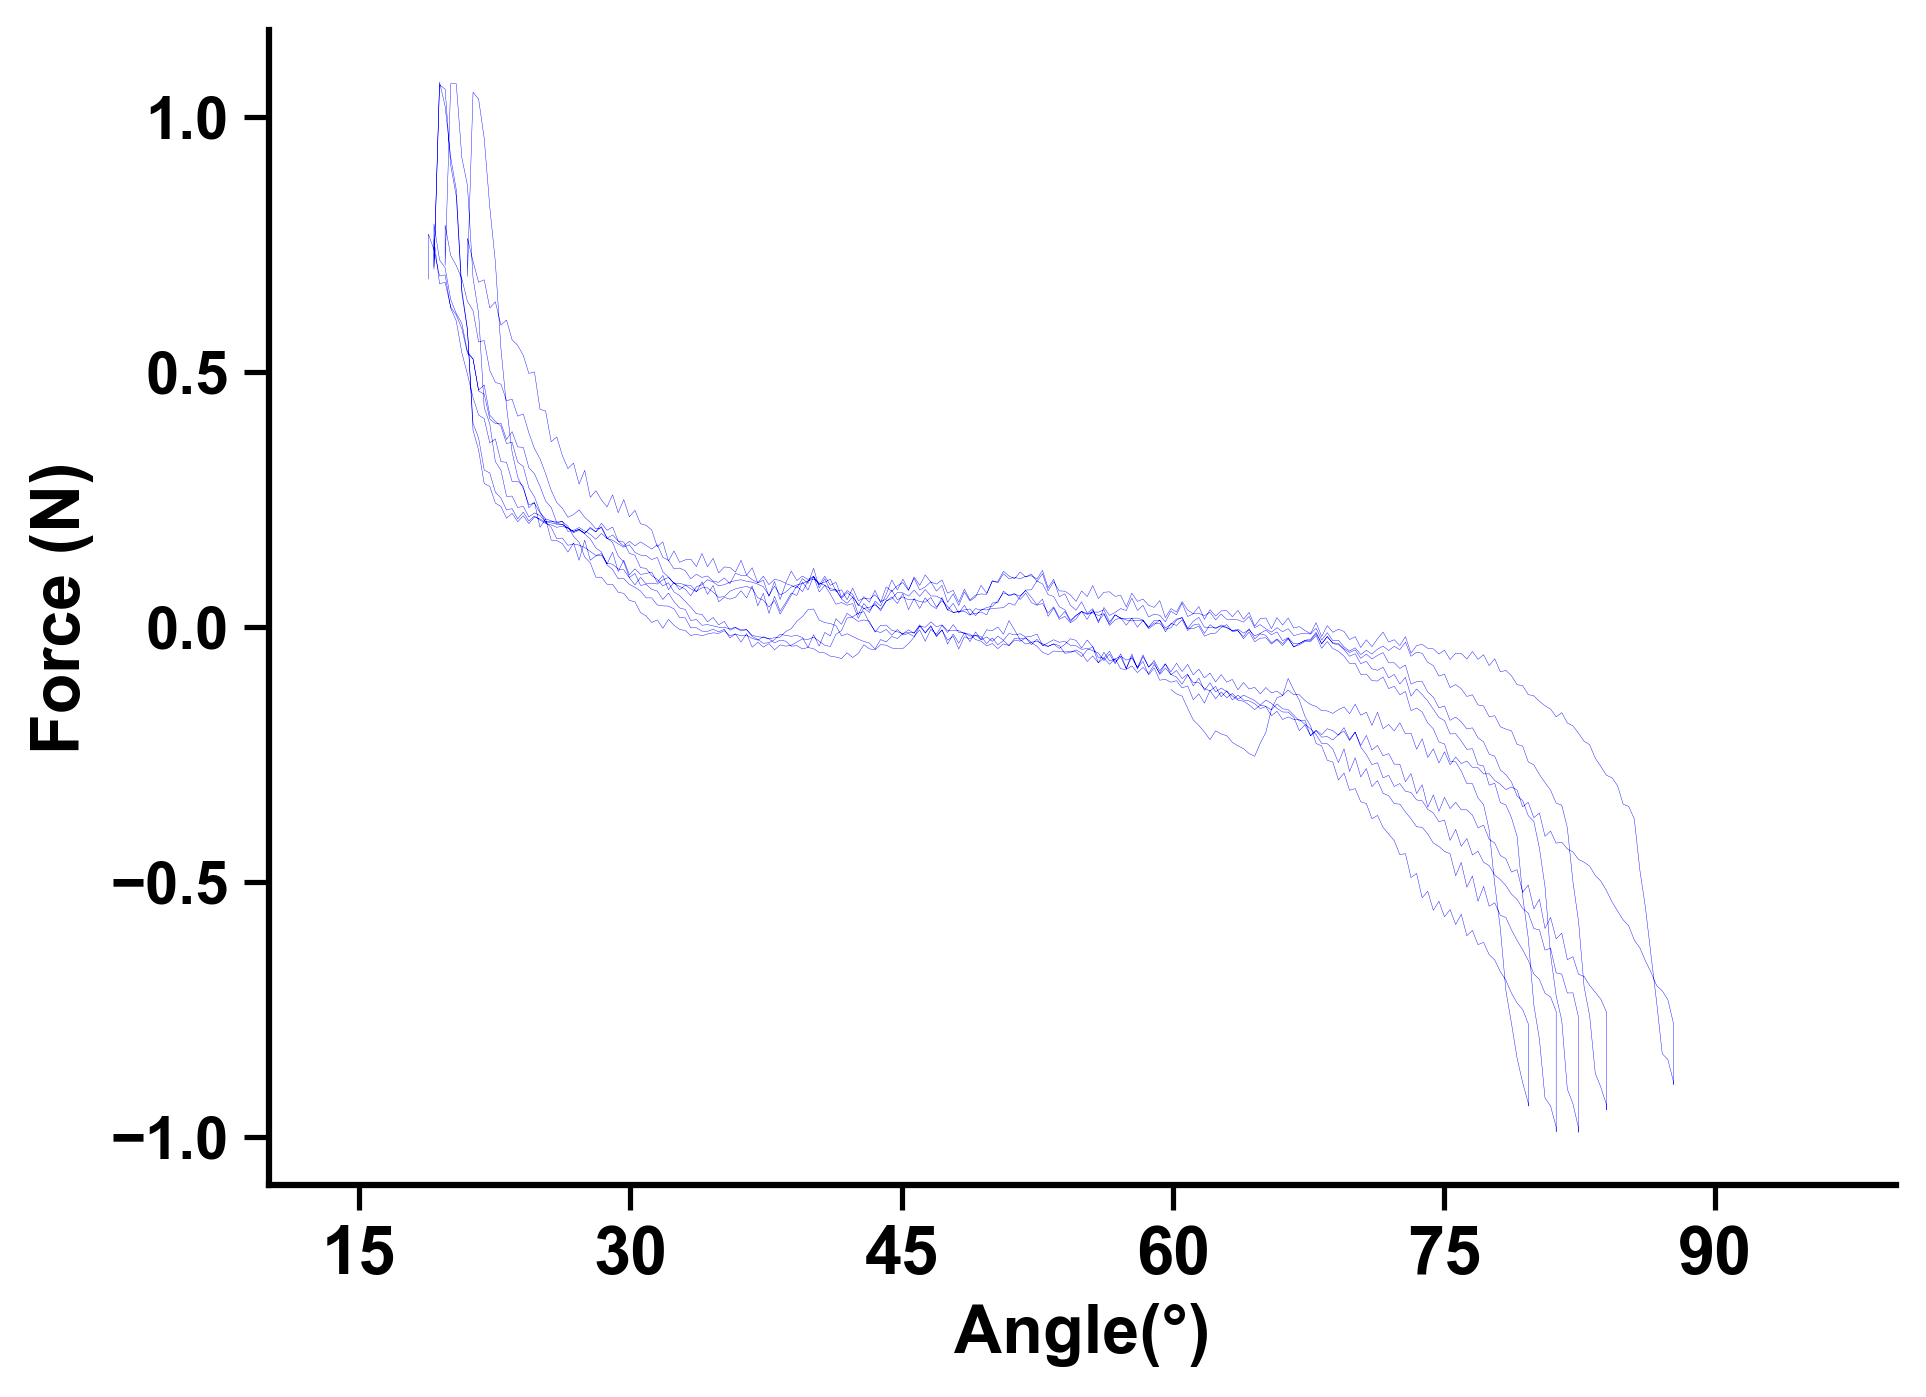

In [5]:
import readyplot as rp
import pandas as pd
df = pd.read_csv('/Users/alexandergadin/PycharmProjects/Rat_Flex_v3/data/20250131_6548_03/20250131_None_6548_01.csv')
df = df.iloc[:, [1, 2]]  # Keep only the 2nd and 3rd columns
df.columns = ['angle', 'force']  # Rename the columns
new_df = df[['angle', 'force']].copy()
new_df['z'] = 'zlab'
print(new_df)

print(df.iloc[10:15])## INITIALIZE THE PLOTTER WITH ALL OPTIONS (ONLY FIRST 2 LINES REQUIRED)
plotter = rp.line(
    new_df, # essentials # essential x/y lines, can pass list if desired
    custom_x_label='Angle(°)',custom_y_label='Force (N)', # optional titles
    colors=['blue'],markers=['o'],markersize=0, dashes=False, estimator=None,  # optional colors/markers
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = False, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/ratflex.png', linewidth=0.1, sort=False) # optional suppress the legend

#sort equal false to not get weird zip zag behavior

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)

## HANDLE AXES AND FIG AS DESIRED
#ax.set_yticks([50,75,100,125,150])
# ax.set_xticks(x[0:3])
#ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(10, 100)  # Set y-axis limits explicitly
plotter.save()

In [ ]:
import pandas as pd


print(new_df)

In [ ]:
import readyplot as rp
import pandas as pd
df = pd.read_csv('/Users/alexandergadin/PycharmProjects/Rat_Flex_v3/data/20250127_1234_04/20250127_None_1234_01.csv')
df = df.iloc[:, [1, 2]]  # Keep only the 2nd and 3rd columns
df.columns = ['angle', 'force']  # Rename the columns
new_df = df[['angle', 'force']].copy()
new_df['z'] = 'zlab'
print(new_df)

print(df.iloc[10:15])## INITIALIZE THE PLOTTER WITH ALL OPTIONS (ONLY FIRST 2 LINES REQUIRED)
plotter = rp.line(
    new_df, # essentials # essential x/y lines, can pass list if desired
    custom_x_label='Angle(°)',custom_y_label='Force (N)', # optional titles
    colors=['blue'],markers=['o'],markersize=0, dashes=False, estimator=None,  # optional colors/markers
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = False, # optional suppress the legend
    fig_width=4,fig_height=3, linewidth=2,
    folder_name = '/Users/alexandergadin/Desktop/img/simple_ratflex.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)

## HANDLE AXES AND FIG AS DESIRED
#ax.set_yticks([50,75,100,125,150])
# ax.set_xticks(x[0:3])
#ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(10, 170)  # Set y-axis limits explicitly
plotter.save()

y: [-65.45000001, -41.818333345000006, -13.850000000000001]
yerr_low: [5.161111099999999, 4.959444454999989, 8.783333300000002]
yerr_hi: [5.161111099999985, 4.959444454999989, 8.783333300000002]
xlab ylab zlab
<a list of 18 Line2D objects>
This is an added line
/Users/alexandergadin/Desktop/img
Directory '/Users/alexandergadin/Desktop/img' already exists.
xlab ylab zlab
<a list of 18 Line2D objects>
This is an added line
/Users/alexandergadin/Desktop/img
Directory '/Users/alexandergadin/Desktop/img' already exists.


(<Figure size 1200x1200 with 1 Axes>,
 <Axes: title={'center': 'Range of Motion Difference Injured - Contralateral'}, xlabel='Days Post Injury', ylabel='Range of Motion Difference (°)'>)

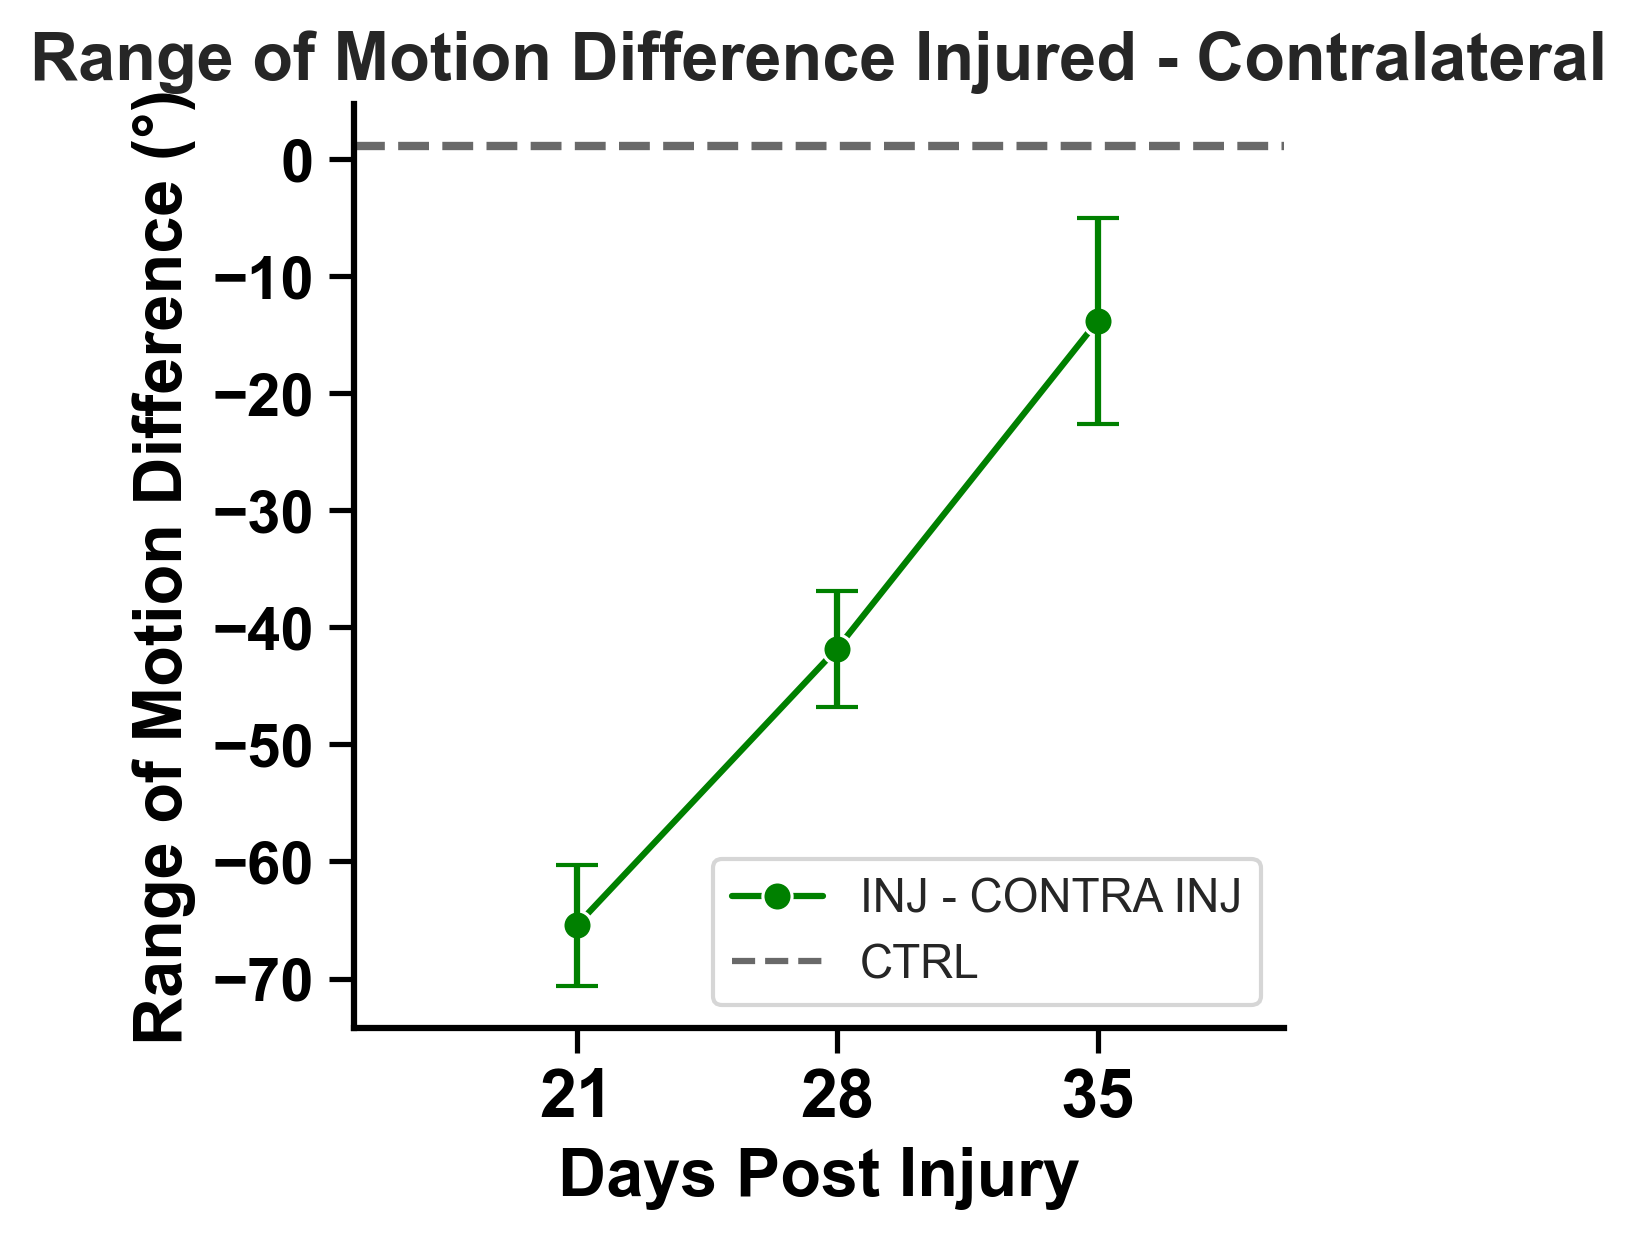

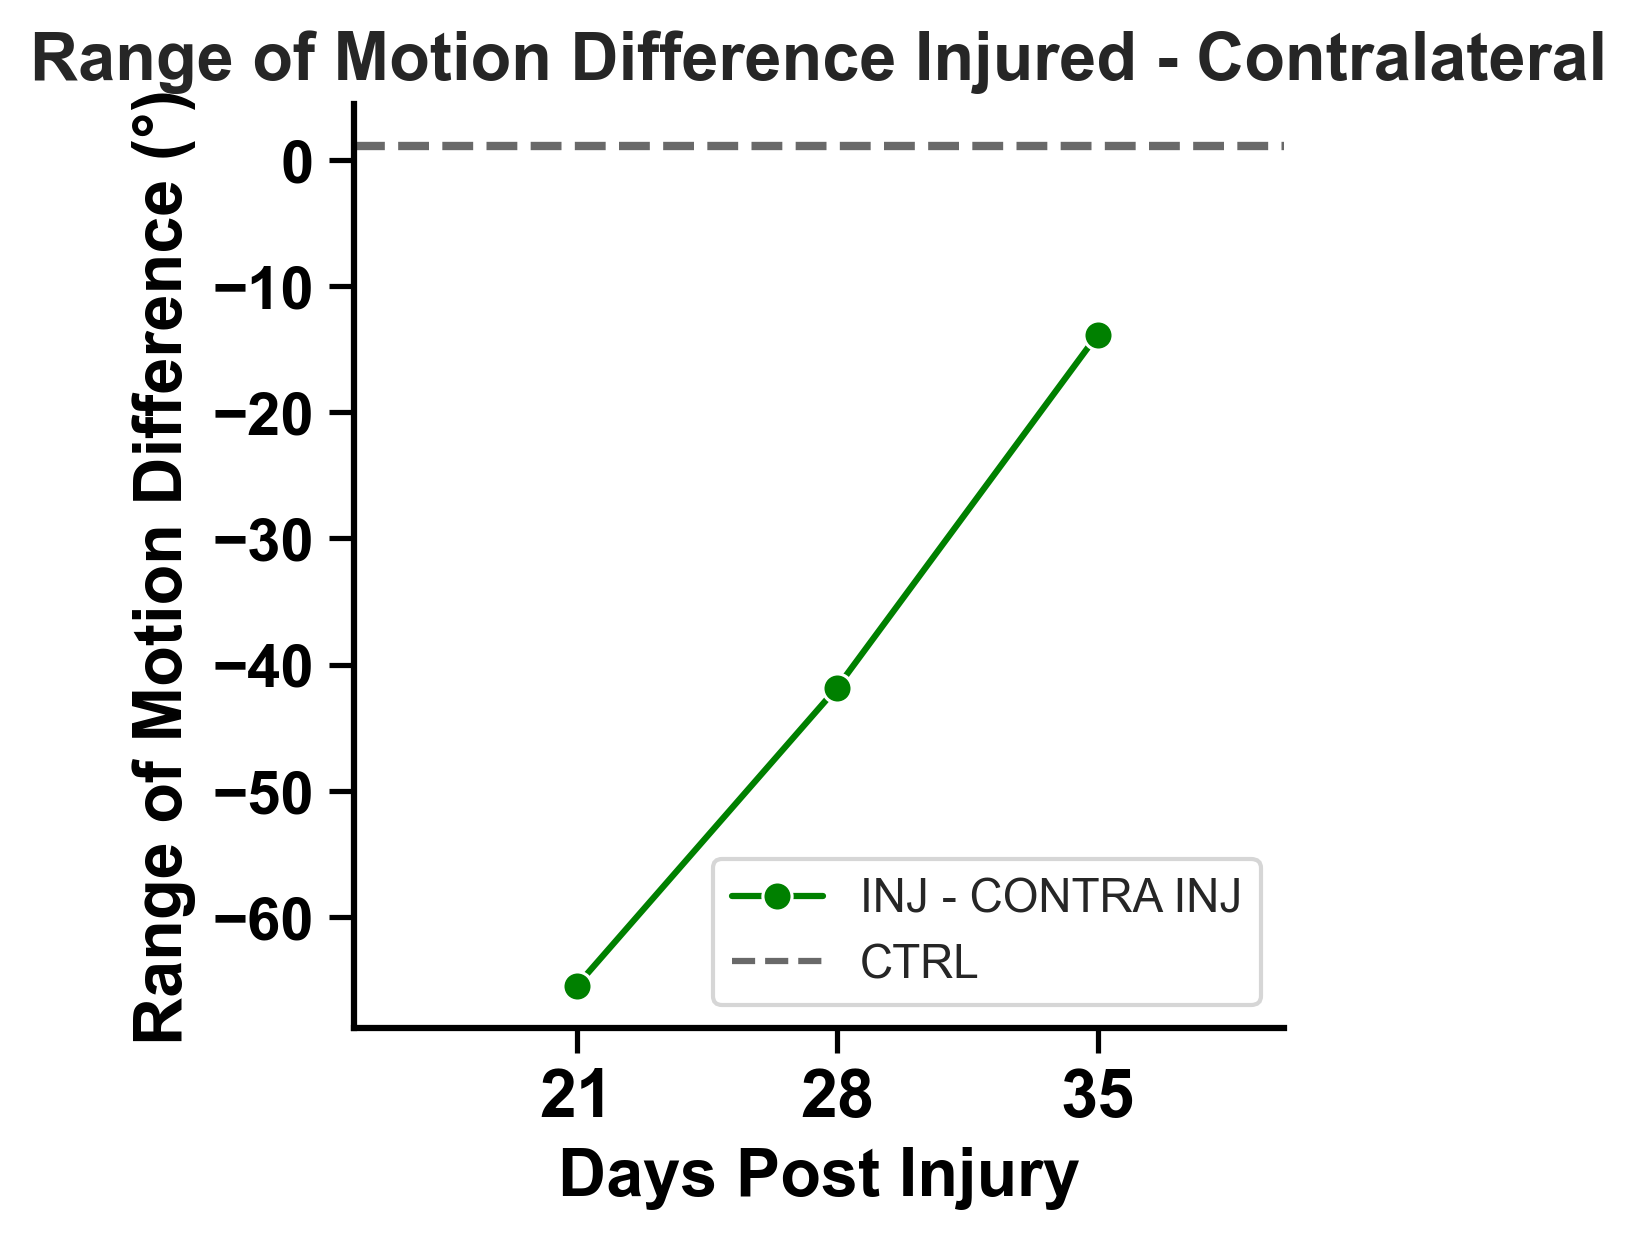

In [3]:
from matplotlib.lines import Line2D

## INITIALIZE X,Y,Z, AND HI/LOW Y ERROR BARS:
x = [21,28,35] # list or numpy array of x
z = ['INJ - CONTRA INJ','INJ - CONTRA INJ','INJ - CONTRA INJ'] # group name for each data point (x,y,z, could be dataframe)
y6548 = [134, 128.27, 131.9111111, 63.38888889, 91.41111111, 109.2777778]
y6549 = [139.0777778, 148.6777778, 122.2555556, 78.78888889, 101.9, 117.1888889]

y6548_subtracted = [y6548[i + 3] - y6548[i] for i in range(3)]
y6549_subtracted = [y6549[i + 3]- y6549[i]  for i in range(3)]


y = [(a + b) / 2 for a, b in zip(y6548_subtracted, y6549_subtracted)]
yerr_low = [abs(a - avg) for a, avg in zip(y6548_subtracted, y)]
yerr_hi = [abs(b - avg) for b, avg in zip(y6549_subtracted, y)]

print("y:", y)
print("yerr_low:", yerr_low)
print("yerr_hi:", yerr_hi)

## INITIALIZE THE PLOTTER WITH ALL OPTIONS (ONLY FIRST 2 LINES REQUIRED)
plotter = rp.line(
    x,y,z,low_yerror_vals = yerr_low,hi_yerror_vals = yerr_hi, # essentials
    ylines = 1.122, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Range of Motion Difference (°)',title='Range of Motion Difference Injured - Contralateral', # optional titles
    colors=['green'],markers=['o'],markersize=7, dashes=False,  # optional colors/markers
    capsize = 5, # optional error capsize
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/Average_ROM_dif_errorbars_green.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)

## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

## HANDLE AXES AND FIG AS DESIRED
#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
#ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()

plotter = rp.line(
    x,y,z, low_yerror_vals = [0,0,0] ,hi_yerror_vals = [0,0,0], # essentials
    ylines = 1.122, # essential x/y lines, can pass list if desired
    custom_x_label='Days Post Injury',custom_y_label='Range of Motion Difference (°)',title='Range of Motion Difference Injured - Contralateral', # optional titles
    colors=['green'],markers=['o'],markersize=7, dashes=False, # optional colors/markers
    sci_x_lims = (0,3),sci_y_lims = (0,3), # optional, only applies scientific out 0.1-1000
    legend = True,fig_width=4,fig_height=4, # optional suppress the legend
    folder_name = '/Users/alexandergadin/Desktop/img/Average_ROM_dif_green.png') # optional suppress the legend

## PLOT AND CATCH OUTPUT FIG AND AX
fig,ax = plotter.plot(save=False)


## ADDING LINE TO LEGEND (FORMATTING GETS MESSED UP)
handles, labels = ax.get_legend_handles_labels()
vline_handle = Line2D([0], [0], color='dimgray', linestyle='--')
handles.append(vline_handle)
labels.append('CTRL')
ax.legend(handles=handles, labels=labels)

print(ax.get_lines())
for line in ax.get_lines():
    if '--' in line.get_linestyle():
        print('This is an added line')
        line.set(linewidth=2,color='dimgray')

#ax.set_yticks([50,75,100,125,150])
ax.set_xticks(x[0:3])
# ax.set_ylim(50, 150)  # Set y-axis limits explicitly
ax.set_xlim(15, 40)  # Set y-axis limits explicitly
plotter.save()